# Ques 5
### Write a python code to Implement the KNN classifier on Glass Type Classification dataset using scikit-learn. Also check the accuracy of the model. Note: Dataset is available on https://www.kaggle.com/uciml/glass
### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing dataset and extracting variables

In [2]:
dataset = pd.read_csv('glass.csv')
dataset.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
dataset.shape

(214, 10)

In [4]:
# extracting variables

X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

print(X.shape)
print(y.shape)

(214, 9)
(214,)


### Preprocessing the data

In [5]:
# checking for nan values

X.isnull().sum()

RI    0
Na    0
Mg    0
Al    0
Si    0
K     0
Ca    0
Ba    0
Fe    0
dtype: int64

In [22]:
# splitting the dataset into training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(171, 9)
(43, 9)


In [23]:
# feature scaling

from sklearn.preprocessing import StandardScaler

st = StandardScaler()
X_train = st.fit_transform(X_train)
X_test = st.transform(X_test)

X_train[:5]

array([[-0.84623746, -0.74467528,  0.52636164,  1.01287057,  0.345884  ,
         0.33930631, -0.68807645, -0.33761134, -0.60110996],
       [ 0.28077633,  0.33413832,  0.54088841, -1.40290866,  0.07169648,
        -0.609516  , -0.03692037, -0.04564469,  1.78472688],
       [-0.0992632 ,  0.43938842, -2.03034913, -1.8020374 ,  2.42187517,
        -0.89595292,  1.44941417, -0.33761134, -0.60110996],
       [ 0.76237816,  0.518326  , -0.37429784,  0.0255521 , -0.7900357 ,
        -0.01873984,  0.64254685, -0.33761134,  1.0888578 ],
       [ 0.03833732, -0.03423706,  0.4609912 ,  0.0255521 , -0.4375089 ,
         0.01706477, -0.24217609, -0.33761134, -0.60110996]])

### Model creation and fitting

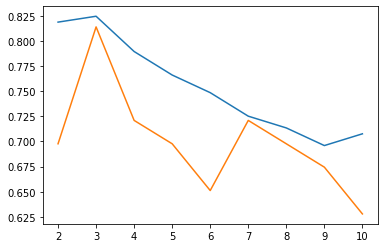

In [24]:
# testing best value of n_neighbors in knn classifier

from sklearn.neighbors import KNeighborsClassifier

score_train = []
score_test = []
for i in range(2,11):
    model = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    score_train.append(model.score(X_train, y_train))
    score_test.append(model.score(X_test, y_test))

plt.plot(range(2,11), score_train)
plt.plot(range(2,11), score_test)

In [25]:
# creating the model and fitting the data into it

knnclf = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

In [26]:
# checking the confision matrix

from sklearn.metrics import confusion_matrix, classification_report

y_pred = knnclf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[10,  1,  0,  0,  0,  0],
       [ 3, 11,  0,  0,  0,  0],
       [ 2,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  3,  0,  0],
       [ 0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  0,  8]])

In [27]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.67      0.91      0.77        11
           2       0.79      0.79      0.79        14
           3       0.00      0.00      0.00         3
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         8

    accuracy                           0.81        43
   macro avg       0.74      0.74      0.74        43
weighted avg       0.78      0.81      0.79        43



/home/sanket/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
# training and testing scores

print('Training Set Score: {:.3f}'.format(knnclf.score(X_train, y_train)))
print('Testing Set Score: {:.3f}'.format(knnclf.score(X_test, y_test)))

Training Set Score: 0.825
Testing Set Score: 0.814
